# Getting started with transforms v2

## 前準備

In [1]:
from pathlib import Path
import torch
import matplotlib.pyplot as plt
plt.rcParams['savefig.bbox'] = 'tight'

from torchvision.transforms import v2
from torchvision.io import decode_image

In [15]:
torch.manual_seed(1)

from my_helpers import plot
img = decode_image(str(Path('./assets') / 'astronaut.jpg'))
print(f'{type(img) = }, {img.dtype = }, {img.shape = }')

type(img) = <class 'torch.Tensor'>, img.dtype = torch.uint8, img.shape = torch.Size([3, 512, 512])


In [20]:
img

tensor([[[148, 112,  73,  ..., 125, 125, 125],
         [178, 150, 119,  ..., 125, 125, 125],
         [203, 186, 168,  ..., 125, 125, 125],
         ...,
         [185, 184, 184,  ...,   3,   7,  10],
         [181, 181, 180,  ...,   9,  10,   3],
         [180, 179, 177,  ...,   3,   7,   5]],

        [[139, 103,  65,  ..., 116, 116, 116],
         [169, 141, 111,  ..., 116, 116, 116],
         [195, 178, 160,  ..., 116, 116, 116],
         ...,
         [170, 169, 167,  ...,   0,   3,   6],
         [168, 169, 165,  ...,   5,   6,   0],
         [167, 167, 162,  ...,   0,   3,   1]],

        [[158, 120,  80,  ..., 111, 111, 111],
         [186, 158, 124,  ..., 111, 111, 111],
         [210, 191, 171,  ..., 111, 111, 111],
         ...,
         [177, 174, 173,  ...,   0,   0,   3],
         [175, 173, 170,  ...,   2,   3,   0],
         [174, 171, 167,  ...,   0,   0,   0]]], dtype=torch.uint8)

In [39]:
img.size()

torch.Size([3, 512, 512])

In [35]:
img.dtype

torch.uint8

In [37]:
img.min(), img.max()

(tensor(0, dtype=torch.uint8), tensor(255, dtype=torch.uint8))

- size -> (x, h, w)  
    - x: 使用している色の数を表す。1なら白黒、3ならR,G,B全て。  
    - h, w: 画像縦幅のピクセル数

- img.min(), img.max() -> (tensor(0), tensor(255))
    - 画像に含まれる画素値の最大値と最小値を示す。　　
    0は黒、225はその色が最も明るく映っている状態。  
    - この画像には真っ黒な部分から、最も明るい部分までフルレンジでデータが含まれている

- dtypeはデータ型　ex)torch.uint8

## 基本

**変更をインスタンス化し、入力を渡し、変換された出力を取得する。**

- 変更をインスタンス化  
    - `resize = v2.Resize((224, 224))`    
    Resize という「画像を小さくする設計図（クラス）」から実際に使える 道具（インスタンス） を1個作った。

- 入力を渡し
    - `img_resized = resize(img)`  
    画像をその道具にいれる

- 変換された出力を取得する
    - `img_resized`  
    サイズ変更された画像

In [22]:
transform = v2.RandomCrop(size=(224,224))
out = transform(img)

In [27]:
out.size()

torch.Size([3, 224, 224])

([奥行き、縦、横])

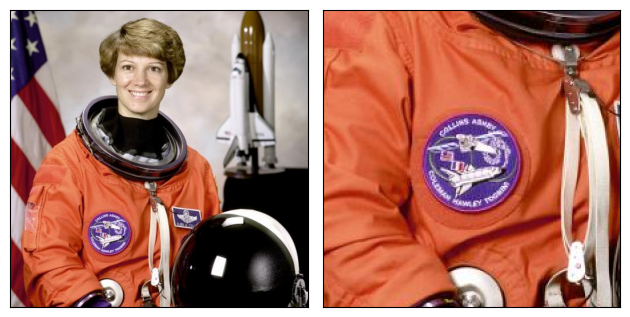

In [28]:
plot([img, out])

In [34]:
type(img)

torch.Tensor

## 画像分類

**基本的な分類パイプライン**  

画像をモデル入力用に変換し、変換前後を並べて表示  

- `v2.Compose`  
複数の変換を順番につなげる装置　　
    - `v2.ToDtype(torch.float32, scale=True)`  
    型変換 + 値のスケーリング  
        - 型：Tensor -> float32　正規化するにはfloat型にする必要がある。
        - 値：0-255
    - `v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])`  
    これらの値は、ImageNetという画像データセットから得た。これを用いて正規化を行い、未知の画像を正規化（標準化）する。  

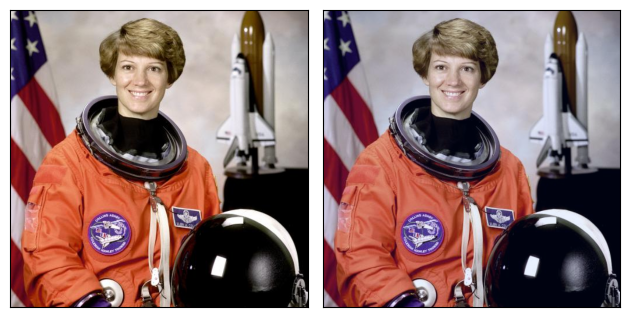

In [29]:
transform = v2.Compose([
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.465, 0.406],
                 std=[0.229, 0.224, 0.225]),
])

out = transform(img)

plot([img, out])

In [33]:
print(transform)
print(transform(img))

Compose(
      ToDtype(scale=True)
      Normalize(mean=[0.485, 0.465, 0.406], std=[0.229, 0.224, 0.225], inplace=False)
)
tensor([[[ 0.4166, -0.1999, -0.8678,  ...,  0.0227,  0.0227,  0.0227],
         [ 0.9303,  0.4508, -0.0801,  ...,  0.0227,  0.0227,  0.0227],
         [ 1.3584,  1.0673,  0.7591,  ...,  0.0227,  0.0227,  0.0227],
         ...,
         [ 1.0502,  1.0331,  1.0331,  ..., -2.0665, -1.9980, -1.9467],
         [ 0.9817,  0.9817,  0.9646,  ..., -1.9638, -1.9467, -2.0665],
         [ 0.9646,  0.9474,  0.9132,  ..., -2.0665, -1.9980, -2.0323]],

        [[ 0.3576, -0.2727, -0.9379,  ..., -0.0451, -0.0451, -0.0451],
         [ 0.8828,  0.3926, -0.1326,  ..., -0.0451, -0.0451, -0.0451],
         [ 1.3380,  1.0404,  0.7252,  ..., -0.0451, -0.0451, -0.0451],
         ...,
         [ 0.9003,  0.8828,  0.8478,  ..., -2.0759, -2.0234, -1.9709],
         [ 0.8653,  0.8828,  0.8128,  ..., -1.9884, -1.9709, -2.0759],
         [ 0.8478,  0.8478,  0.7602,  ..., -2.0759, -2.0234, -2.05

In [43]:
out.size(), img.size()

(torch.Size([3, 512, 512]), torch.Size([3, 512, 512]))

In [45]:
type(out), type(img)

(torch.Tensor, torch.Tensor)

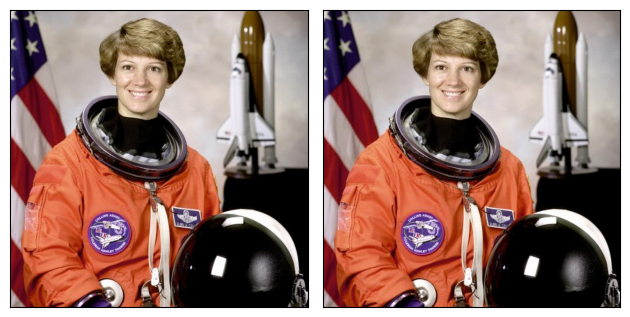

In [63]:
transform = v2.Compose([
    v2.ToDtype(torch.float32, scale=True),  # scaleは多分255で割っている。じゃないと整数を少数の物差しで測っているからほとんどが値が大きい→白い、となる
])
out = transform(img)
plot([img, out])

In [52]:
img

tensor([[[148, 112,  73,  ..., 125, 125, 125],
         [178, 150, 119,  ..., 125, 125, 125],
         [203, 186, 168,  ..., 125, 125, 125],
         ...,
         [185, 184, 184,  ...,   3,   7,  10],
         [181, 181, 180,  ...,   9,  10,   3],
         [180, 179, 177,  ...,   3,   7,   5]],

        [[139, 103,  65,  ..., 116, 116, 116],
         [169, 141, 111,  ..., 116, 116, 116],
         [195, 178, 160,  ..., 116, 116, 116],
         ...,
         [170, 169, 167,  ...,   0,   3,   6],
         [168, 169, 165,  ...,   5,   6,   0],
         [167, 167, 162,  ...,   0,   3,   1]],

        [[158, 120,  80,  ..., 111, 111, 111],
         [186, 158, 124,  ..., 111, 111, 111],
         [210, 191, 171,  ..., 111, 111, 111],
         ...,
         [177, 174, 173,  ...,   0,   0,   3],
         [175, 173, 170,  ...,   2,   3,   0],
         [174, 171, 167,  ...,   0,   0,   0]]], dtype=torch.uint8)

In [59]:
out

tensor([[[0.5804, 0.4392, 0.2863,  ..., 0.4902, 0.4902, 0.4902],
         [0.6980, 0.5882, 0.4667,  ..., 0.4902, 0.4902, 0.4902],
         [0.7961, 0.7294, 0.6588,  ..., 0.4902, 0.4902, 0.4902],
         ...,
         [0.7255, 0.7216, 0.7216,  ..., 0.0118, 0.0275, 0.0392],
         [0.7098, 0.7098, 0.7059,  ..., 0.0353, 0.0392, 0.0118],
         [0.7059, 0.7020, 0.6941,  ..., 0.0118, 0.0275, 0.0196]],

        [[0.5451, 0.4039, 0.2549,  ..., 0.4549, 0.4549, 0.4549],
         [0.6627, 0.5529, 0.4353,  ..., 0.4549, 0.4549, 0.4549],
         [0.7647, 0.6980, 0.6275,  ..., 0.4549, 0.4549, 0.4549],
         ...,
         [0.6667, 0.6627, 0.6549,  ..., 0.0000, 0.0118, 0.0235],
         [0.6588, 0.6627, 0.6471,  ..., 0.0196, 0.0235, 0.0000],
         [0.6549, 0.6549, 0.6353,  ..., 0.0000, 0.0118, 0.0039]],

        [[0.6196, 0.4706, 0.3137,  ..., 0.4353, 0.4353, 0.4353],
         [0.7294, 0.6196, 0.4863,  ..., 0.4353, 0.4353, 0.4353],
         [0.8235, 0.7490, 0.6706,  ..., 0.4353, 0.4353, 0.

In [56]:
print(f'imgとoutで出力されるtensorの左上の値に注目すると、{148/255}')
print('つまり、torch.floatにより最大値である255を用いて変換されている')

imgとoutで出力されるtensorの左上の値に注目すると、0.5803921568627451
つまり、torch.floatにより最大値である255を用いて変換されている


**tensorの要素について**

tensorの要素は1ピクセルの色の明るさを示している。  
sizeを見ると、(3, 512, 512)となっている。これは、512×512というサイズの画像であり、R,G,Bに分けられる（を利用している）と示せる。  
なので、tensorの要素はまず3つに分割でき、それぞれ1ピクセルの中に存在する色を分け、赤の成分はこれくらい、緑・青の成分はこれくらいとなっている。（出力を見ると、`]`で区切られている。  
光の三原色を用いているので、値が小さい方が黒を示す。  
float型にするときは255という成分の最大値を用いて変換（正規化）し、その色の対応する平均と標準偏差を用いて標準化を行う。    
つまり今回は、1ピクセルは3つの要素を持つことがわかる。

In [48]:
type(img)

torch.Tensor

- Composeから出た画像はtorch.tensor型になる。

<class 'torchvision.tv_tensors._bounding_boxes.BoundingBoxes'> <class 'torchvision.tv_tensors._bounding_boxes.BoundingBoxes'>


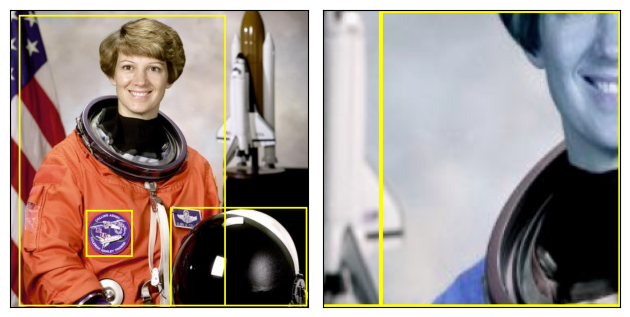

In [40]:
from torchvision import tv_tensors  # we'll describe this a bit later, bare with us

boxes = tv_tensors.BoundingBoxes(
    [
        [15, 10, 370, 510],
        [275, 340, 510, 510],
        [130, 345, 210, 425]
    ],
    format="XYXY", canvas_size=img.shape[-2:])

transforms = v2.Compose([
    v2.RandomResizedCrop(size=(224, 224), antialias=True),
    v2.RandomPhotometricDistort(p=1),
    v2.RandomHorizontalFlip(p=1),
])
out_img, out_boxes = transforms(img, boxes)
print(type(boxes), type(out_boxes))

plot([(img, boxes), (out_img, out_boxes)])